# 주제 : 오늘 밤 유럽 축구, 어디가 이길까? 데이터로 분석하고 내기를 이겨보자!
----------

## 실습 가이드
    1. 데이터를 다운로드하여 Colab에 불러옵니다.
    2. 필요한 라이브러리는 모두 코드로 작성되어 있습니다.
    3. 코드는 위에서부터 아래로 순서대로 실행합니다.
    
    
## 데이터 소개
    - 이번 주제는 European Soccer Database 데이터셋을 사용합니다.
    
    - 다음 1개의 sqlite 데이터베이스를 사용합니다.
    database.sqlite

    - 데이터 베이스 내 총 7개의 Table을 사용합니다.
    Country: 국가 정보
    League: 리그 정보
    Match: 경기 정보 (주 데이터셋)
    Player: 플레이어 정보
    Player_Attributes: 플레이어의 특성
    Team: 팀 정보
    Team_Attributes: 팀의 특성
    
- 데이터 출처: https://www.kaggle.com/hugomathien/soccer

## 최종 목표
    - SQL 데이터셋에서 테이블을 읽어들이는 방법 이해
    - 여러개의 테이블을 통합하는 방법 이해
    - 수 많은 데이터로부터 관심있는 데이터를 식별
    - 학습된 모델로부터 인사이트 습득 방법 이해

- 출제자 : 신제용 강사
---

## Step 0. 데이터베이스와 SQL

### 데이터베이스란


### SQL과 Query


## Step 1. 데이터셋 준비하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 문제 1. Colab Notebook에 Kaggle API 세팅하기


In [2]:
import os

In [3]:
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기
os.environ['KAGGLE_USERNAME'] = 'kimhagdori'
os.environ['KAGGLE_KEY'] = '5f09cbd68873b51cb127ca6c2daa552d'

### 문제 2. 데이터 다운로드 및 압축 해제하기


In [4]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드하기 (!kaggle ~)
# Linux 명령어로 압축 해제하기

# !kaggle datasets download -d hugomathien/soccer
# !unzip "*.zip"

### 문제 3. sqlite3와 Pandas로 sqlite 데이터베이스 읽어들이기


In [5]:
import sqlite3

In [6]:
conn = sqlite3.connect('./database.sqlite')

cur = conn.cursor()
cur.execute('SELECT * FROM country')

rows = cur.fetchall()

for row in rows:
    print(row)

(1, 'Belgium')
(1729, 'England')
(4769, 'France')
(7809, 'Germany')
(10257, 'Italy')
(13274, 'Netherlands')
(15722, 'Poland')
(17642, 'Portugal')
(19694, 'Scotland')
(21518, 'Spain')
(24558, 'Switzerland')


In [7]:
conn = sqlite3.connect('./database.sqlite')
cur = conn.cursor()
cur.execute('select * from country')

rows = cur.fetchall()
for row in rows:
    print(row)
    
cur.close()
conn.close()

(1, 'Belgium')
(1729, 'England')
(4769, 'France')
(7809, 'Germany')
(10257, 'Italy')
(13274, 'Netherlands')
(15722, 'Poland')
(17642, 'Portugal')
(19694, 'Scotland')
(21518, 'Spain')
(24558, 'Switzerland')


In [8]:
# sqlite3.connect()와 pd.read_sql_query()로 csv파일 읽어들이기
conn = sqlite3.connect('./database.sqlite')
df_country = pd.read_sql_query("SELECT * FROM country", con = sqlite3.connect('./database.sqlite'))
df_league = pd.read_sql_query("SELECT * FROM league", con = sqlite3.connect('./database.sqlite'))
df_match = pd.read_sql_query("SELECT * FROM match", con = sqlite3.connect('./database.sqlite'))
df_player = pd.read_sql_query("SELECT * FROM player", con = sqlite3.connect('./database.sqlite'))
df_player_att = pd.read_sql_query("SELECT * FROM player_attributes", con = sqlite3.connect('./database.sqlite'))
df_team = pd.read_sql_query("SELECT * FROM team", con = sqlite3.connect('./database.sqlite'))
df_team_att = pd.read_sql_query("SELECT * FROM team_attributes", con = sqlite3.connect('./database.sqlite'))

In [9]:
print(f'----------Country----------')
display(df_country.head())
print(f'----------league----------')
display(df_league.head())
print(f'----------match----------')
display(df_match.head())
print(f'----------player----------')
display(df_player.head())
print(f'----------player_Att----------')
display(df_player_att.head())
print(f'----------team----------')
display(df_team.head())
print(f'----------player_Att----------')
display(df_team_att.head())

----------Country----------


,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


----------league----------


,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


----------match----------


,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


----------player----------


,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


----------player_Att----------


,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


----------team----------


,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


----------player_Att----------


,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


## Step 2. EDA 및 데이터 기초 통계 분석


### 문제 4. 각 데이터프레임의 구조 파악하기


In [10]:
# DataFrame에서 제공하는 메소드를 이용하여 각 데이터프레임의 구조 분석하기 (head(), info(), describe())


print(f'----------Country----------')
display(df_country.info())
print(f'----------league----------')
display(df_league.info())
print(f'----------match----------')
display(df_match.info())
print(f'----------player----------')
display(df_player.info())
print(f'----------player_Att----------')  ## Null 값 존재
display(df_player_att.info())
print(f'----------team----------') ## Null 값 존재 (team_fifa_api_id)
display(df_team.info())
print(f'----------team_Att----------') ## team_Att attributes Null 값 존재 (buildUpPlayDribblingClass)
display(df_team_att.info())

----------Country----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      11 non-null     int64 
 1   name    11 non-null     object
dtypes: int64(1), object(1)
memory usage: 304.0+ bytes


None

----------league----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          11 non-null     int64 
 1   country_id  11 non-null     int64 
 2   name        11 non-null     object
dtypes: int64(2), object(1)
memory usage: 392.0+ bytes


None

----------match----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB


None

----------player----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11060 non-null  int64  
 1   player_api_id       11060 non-null  int64  
 2   player_name         11060 non-null  object 
 3   player_fifa_api_id  11060 non-null  int64  
 4   birthday            11060 non-null  object 
 5   height              11060 non-null  float64
 6   weight              11060 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB


None

----------player_Att----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null 

None

----------team----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                299 non-null    int64  
 1   team_api_id       299 non-null    int64  
 2   team_fifa_api_id  288 non-null    float64
 3   team_long_name    299 non-null    object 
 4   team_short_name   299 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


None

----------team_Att----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_api_id                     1458 non-null   int64  
 3   date                            1458 non-null   object 
 4   buildUpPlaySpeed                1458 non-null   int64  
 5   buildUpPlaySpeedClass           1458 non-null   object 
 6   buildUpPlayDribbling            489 non-null    float64
 7   buildUpPlayDribblingClass       1458 non-null   object 
 8   buildUpPlayPassing              1458 non-null   int64  
 9   buildUpPlayPassingClass         1458 non-null   object 
 10  buildUpPlayPositioningClass     1458 non-null   object 
 11  chanceCreationPassing           1458 non-null   int64  
 12  chanc

None

In [11]:
# DataFrame에서 제공하는 메소드를 이용하여 각 데이터프레임의 구조 분석하기 (head(), info(), describe())


print(f'----------Country----------')
display(df_country.describe())
print(f'----------league----------')
display(df_league.describe())
print(f'----------match----------')
display(df_match.describe())
print(f'----------player----------')
display(df_player.describe())
print(f'----------player_Att----------') 
display(df_player_att.describe())
print(f'----------team----------') 
display(df_team.describe())
print(f'----------team_Att----------') 
display(df_team_att.describe())

----------Country----------


,id
count,11.000000
mean,12452.090909
std,8215.308472
min,1.000000
25%,6289.000000
50%,13274.000000
75%,18668.000000
max,24558.000000


----------league----------


,id,country_id
count,11.000000,11.000000
mean,12452.090909,12452.090909
std,8215.308472,8215.308472
min,1.000000,1.000000
25%,6289.000000,6289.000000
50%,13274.000000,13274.000000
75%,18668.000000,18668.000000
max,24558.000000,24558.000000


----------match----------


,id,country_id,league_id,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
count,25979.000000,25979.000000,25979.000000,25979.000000,2.597900e+04,25979.000000,25979.000000,25979.000000,25979.000000,24158.000000,...,17097.000000,22568.000000,22568.000000,22568.000000,14162.000000,14162.000000,14162.000000,14161.000000,14161.000000,14161.000000
mean,12990.000000,11738.630317,11738.630317,18.242773,1.195429e+06,9984.371993,9984.475115,1.544594,1.160938,0.999586,...,4.622343,2.668107,3.899048,4.840281,2.498764,3.648189,4.353097,2.497894,3.660742,4.405663
std,7499.635658,7553.936759,7553.936759,10.407354,4.946279e+05,14087.453758,14087.445135,1.297158,1.142110,0.022284,...,3.632164,1.928753,1.248221,4.318338,1.489299,0.867440,3.010189,1.507793,0.868272,3.189814
min,1.000000,1.000000,1.000000,1.000000,4.831290e+05,1601.000000,1601.000000,0.000000,0.000000,0.000000,...,1.100000,1.030000,1.620000,1.080000,1.050000,1.450000,1.120000,1.040000,1.330000,1.120000
25%,6495.500000,4769.000000,4769.000000,9.000000,7.684365e+05,8475.000000,8475.000000,1.000000,0.000000,1.000000,...,2.500000,1.700000,3.300000,2.550000,1.670000,3.200000,2.500000,1.670000,3.250000,2.500000
50%,12990.000000,10257.000000,10257.000000,18.000000,1.147511e+06,8697.000000,8697.000000,1.000000,1.000000,1.000000,...,3.500000,2.150000,3.500000,3.500000,2.100000,3.300000,3.400000,2.100000,3.400000,3.400000
75%,19484.500000,17642.000000,17642.000000,27.000000,1.709852e+06,9925.000000,9925.000000,2.000000,2.000000,1.000000,...,5.250000,2.800000,4.000000,5.400000,2.650000,3.750000,5.000000,2.620000,3.750000,5.000000
max,25979.000000,24558.000000,24558.000000,38.000000,2.216672e+06,274581.000000,274581.000000,10.000000,9.000000,2.000000,...,41.000000,36.000000,26.000000,67.000000,21.000000,11.000000,34.000000,17.000000,13.000000,34.000000


----------player----------


,id,player_api_id,player_fifa_api_id,height,weight
count,11060.000000,11060.000000,11060.000000,11060.000000,11060.000000
mean,5537.511392,156582.427215,165664.910488,181.867445,168.380289
std,3197.692647,160713.700624,58649.928360,6.369201,14.990217
min,1.000000,2625.000000,2.000000,157.480000,117.000000
25%,2767.750000,35555.500000,151889.500000,177.800000,159.000000
50%,5536.500000,96619.500000,184671.000000,182.880000,168.000000
75%,8306.250000,212470.500000,203883.250000,185.420000,179.000000
max,11075.000000,750584.000000,234141.000000,208.280000,243.000000


----------player_Att----------


,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.00000,183978.000000,183978.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,...,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,91989.50000,165671.524291,135900.617324,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,49.468436,...,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,53110.01825,53851.094769,136927.840510,7.041139,6.592271,17.242135,19.038705,16.488905,14.194068,18.256618,...,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,1.00000,2.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,45995.25000,155798.000000,34763.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,91989.50000,183488.000000,77741.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,137983.75000,199848.000000,191080.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,183978.00000,234141.000000,750584.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,...,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


----------team----------


,id,team_api_id,team_fifa_api_id
count,299.000000,299.000000,288.000000
mean,23735.301003,12340.521739,21534.305556
std,15167.914719,25940.411135,42456.439408
min,1.000000,1601.000000,1.000000
25%,9552.500000,8349.000000,178.750000
50%,22805.000000,8655.000000,673.500000
75%,36250.500000,9886.500000,1910.750000
max,51606.000000,274581.000000,112513.000000


----------team_Att----------


,id,team_fifa_api_id,team_api_id,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
count,1458.000000,1458.000000,1458.000000,1458.000000,489.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,729.500000,17706.982167,9995.727023,52.462277,48.607362,48.490398,52.165295,53.731824,53.969136,46.017147,49.251029,52.185871
std,421.032659,39179.857739,13264.869900,11.545869,9.678290,10.896101,10.360793,11.086796,10.327566,10.227225,9.738028,9.574712
min,1.000000,1.000000,1601.000000,20.000000,24.000000,20.000000,21.000000,20.000000,22.000000,23.000000,24.000000,29.000000
25%,365.250000,110.000000,8457.750000,45.000000,42.000000,40.000000,46.000000,47.000000,48.000000,39.000000,44.000000,47.000000
50%,729.500000,485.000000,8674.000000,52.000000,49.000000,50.000000,52.000000,53.000000,53.000000,45.000000,48.000000,52.000000
75%,1093.750000,1900.000000,9904.000000,62.000000,55.000000,55.000000,59.000000,62.000000,61.000000,51.000000,55.000000,58.000000
max,1458.000000,112513.000000,274581.000000,80.000000,77.000000,80.000000,80.000000,80.000000,80.000000,72.000000,72.000000,73.000000


### 문제 5. 데이터프레임간의 관계 파악하기


#### 확인만 하면 될 데이터프레임

In [12]:
# 데이터프레임 간 중복되는 Column이 있는지 확인하고 유용한 Column 식별하기
# Hint) unique()로 값을 비교하거나, map() 등을 활용하여 Column 관계를 확인


df_country

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [13]:
df_league

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


#### match

In [14]:
df_match.loc[df_match['league_id'] == 1729, :]

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
1728,1729,1729,1729,2008/2009,1,2008-08-17 00:00:00,489042,10260,10261,1,...,10.00,1.28,5.5,12.00,1.30,4.75,10.0,1.29,4.50,11.00
1729,1730,1729,1729,2008/2009,1,2008-08-16 00:00:00,489043,9825,8659,1,...,12.00,1.25,6.0,13.00,1.22,5.50,13.0,1.22,5.00,13.00
1730,1731,1729,1729,2008/2009,1,2008-08-16 00:00:00,489044,8472,8650,0,...,1.73,5.50,3.8,1.65,5.00,3.40,1.7,4.50,3.40,1.73
1731,1732,1729,1729,2008/2009,1,2008-08-16 00:00:00,489045,8654,8528,2,...,3.75,1.90,3.5,4.35,1.91,3.25,4.0,1.91,3.25,3.80
1732,1733,1729,1729,2008/2009,1,2008-08-17 00:00:00,489046,10252,8456,4,...,3.75,1.90,3.5,4.35,1.91,3.25,4.0,1.91,3.30,3.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4763,4764,1729,1729,2015/2016,9,2015-10-17 00:00:00,1988795,8466,8197,2,...,NaN,1.75,3.9,5.00,NaN,NaN,NaN,NaN,NaN,NaN
4764,4765,1729,1729,2015/2016,9,2015-10-19 00:00:00,1988796,10003,10194,0,...,NaN,2.05,3.4,4.10,NaN,NaN,NaN,NaN,NaN,NaN
4765,4766,1729,1729,2015/2016,9,2015-10-17 00:00:00,1988797,8586,8650,0,...,NaN,2.45,3.5,3.00,NaN,NaN,NaN,NaN,NaN,NaN
4766,4767,1729,1729,2015/2016,9,2015-10-17 00:00:00,1988798,9817,9825,0,...,NaN,6.25,4.2,1.60,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df_match['season'].unique()

array(['2008/2009', '2009/2010', '2010/2011', '2011/2012', '2012/2013',
       '2013/2014', '2014/2015', '2015/2016'], dtype=object)

    - goal 이후 도박 배율에 관한것! (빼고 진행)

In [16]:
list(df_match.columns).index('goal')

77

In [17]:
df_match = df_match.drop(df_match.columns[77:], axis= 1)
df_match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Player 데이터프레임

In [18]:
from datetime import datetime

In [19]:
dateToAge = lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

years_ = df_player.birthday.apply(dateToAge)
years = years_.map(lambda x: 2022 - x.year)
years

## 선수 나이 추가
df_player['age'] = years

In [20]:
df_player

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,age
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,30
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146,33
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163,31
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198,40
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154,43
...,...,...,...,...,...,...,...,...
11055,11071,26357,Zoumana Camara,2488,1979-04-03 00:00:00,182.88,168,43
11056,11072,111182,Zsolt Laczko,164680,1986-12-18 00:00:00,182.88,176,36
11057,11073,36491,Zsolt Low,111191,1979-04-29 00:00:00,180.34,154,43
11058,11074,35506,Zurab Khizanishvili,47058,1981-10-06 00:00:00,185.42,172,41


#### Player Attributes 데이터프레임

<AxesSubplot:>

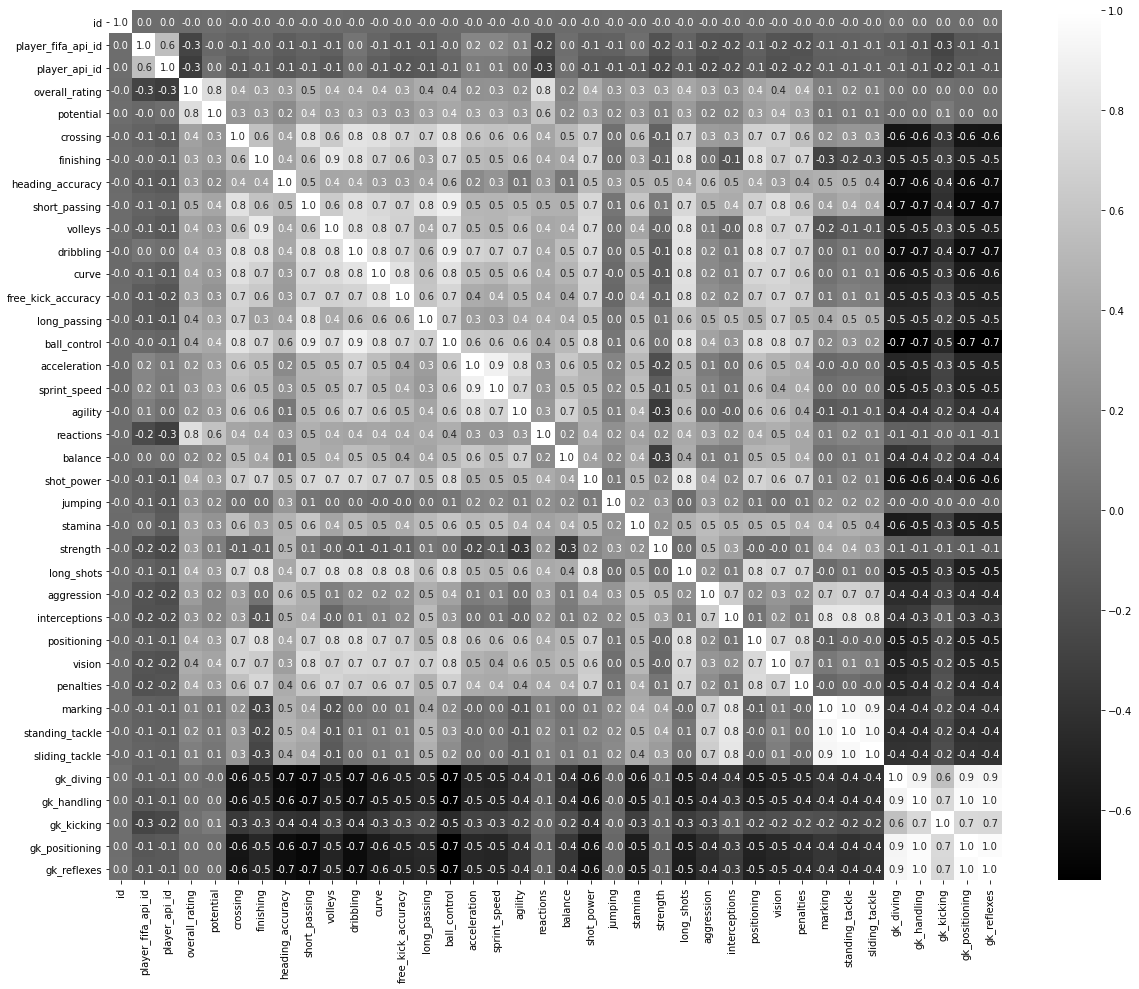

In [21]:
plt.figure(figsize=(20, 16))
sns.heatmap(df_player_att.corr(), annot=True, fmt='.1f', cmap='gray')

# overall_rating이 종합적인 평가 (potential:0.8, )

<AxesSubplot:>

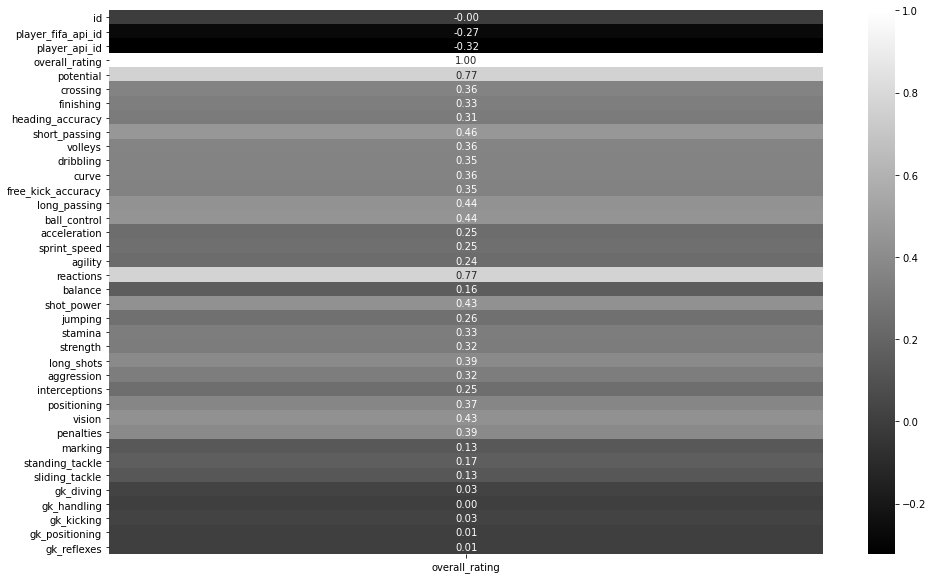

In [22]:
plt.figure(figsize=(16, 10))
sns.heatmap(df_player_att.corr()[['overall_rating']], annot=True, fmt='.2f', cmap='gray')

In [23]:
df_team

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB
...,...,...,...,...,...
294,49479,10190,898.0,FC St. Gallen,GAL
295,49837,10191,1715.0,FC Thun,THU
296,50201,9777,324.0,Servette FC,SER
297,50204,7730,1862.0,FC Lausanne-Sports,LAU


In [24]:
df_team_att

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,1454,15005,10000,2011-02-22 00:00:00,52,Balanced,NaN,Little,52,Mixed,...,53,Normal,Organised,46,Medium,48,Press,53,Normal,Cover
1454,1455,15005,10000,2012-02-22 00:00:00,54,Balanced,NaN,Little,51,Mixed,...,50,Normal,Organised,44,Medium,55,Press,53,Normal,Cover
1455,1456,15005,10000,2013-09-20 00:00:00,54,Balanced,NaN,Little,51,Mixed,...,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover
1456,1457,15005,10000,2014-09-19 00:00:00,54,Balanced,42.0,Normal,51,Mixed,...,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover


-------

In [25]:
# 각 선수 날짜마다 특성이 정리 되 어있음
# 1. 평균 , 2. 날짜 선택해서 확인할 수 있을듯
df_player_att['player_api_id'].value_counts() # min 2 max 56

210278    56
41269     56
42116     55
26472     54
41890     53
          ..
699362     2
458810     2
522771     2
26568      2
73299      2
Name: player_api_id, Length: 11060, dtype: int64

In [26]:
df_player_att.groupby('player_api_id').mean()['overall_rating']

player_api_id
2625      60.142857
2752      69.380952
2768      69.285714
2770      71.133333
2790      70.200000
            ...    
744907    51.909091
746419    59.000000
748432    58.000000
750435    56.444444
750584    58.000000
Name: overall_rating, Length: 11060, dtype: float64

In [27]:
## player와 playerAtt 관계 확인

# away_player_1과 plyer_aip_id의 평균 Overall_rating 딱 들어맞음 (na가 없음)

df_match['away_player_1'].dropna().apply(int).map(df_player_att.groupby('player_api_id').mean()['overall_rating']).isna().sum()

0

In [28]:
df_team['team_api_id'].value_counts()

10242     1
8027      1
8024      1
8535      1
8534      1
         ..
274581    1
9876      1
9875      1
9874      1
8191      1
Name: team_api_id, Length: 299, dtype: int64

In [29]:
df_match['home_team_api_id'].map(df_team_att.groupby('team_api_id').mean()['buildUpPlaySpeed']).isna().sum()

178

### 문제 6. 선수 특성 사이의 상관성 파악하기

<AxesSubplot:>

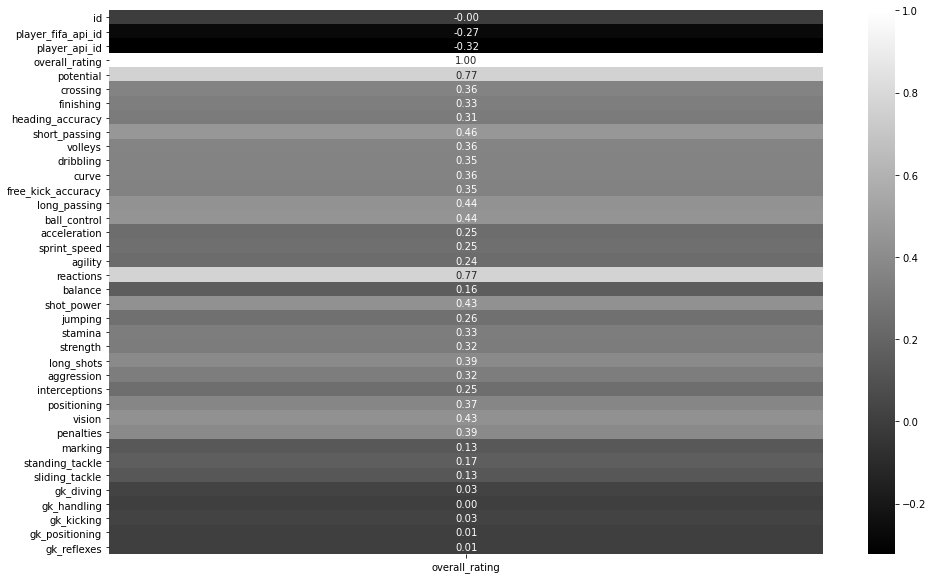

In [30]:
# DataFrame의 corr() 메소드와 Seaborn의 heatmap() 메소드를 이용하여 Pearson's correlation 시각화하기

plt.figure(figsize=(16, 10))
sns.heatmap(df_player_att.corr()[['overall_rating']], annot=True, fmt='.2f', cmap='gray')

# potential, reaction이 상관성 매우 높음
# shot_power, long_shoot, vision, short_passing 높음
# gk는 골키퍼 포지션 선수에만 해당되서 굉장히 낮아 보임

<AxesSubplot:>

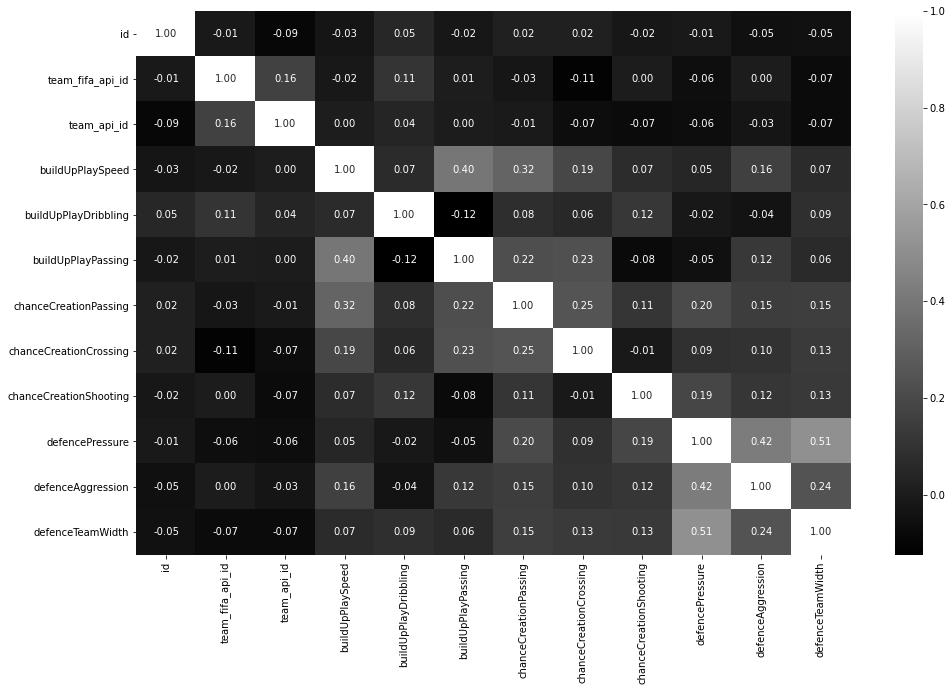

In [31]:
plt.figure(figsize=(16, 10))
sns.heatmap(df_team_att.corr(), annot=True, fmt='.2f', cmap='gray')

### 문제 7. 매치 데이터프레임에 팀 특성 데이터프레임 통합하기


In [32]:
df_team_att.columns

Index(['id', 'team_fifa_api_id', 'team_api_id', 'date', 'buildUpPlaySpeed',
       'buildUpPlaySpeedClass', 'buildUpPlayDribbling',
       'buildUpPlayDribblingClass', 'buildUpPlayPassing',
       'buildUpPlayPassingClass', 'buildUpPlayPositioningClass',
       'chanceCreationPassing', 'chanceCreationPassingClass',
       'chanceCreationCrossing', 'chanceCreationCrossingClass',
       'chanceCreationShooting', 'chanceCreationShootingClass',
       'chanceCreationPositioningClass', 'defencePressure',
       'defencePressureClass', 'defenceAggression', 'defenceAggressionClass',
       'defenceTeamWidth', 'defenceTeamWidthClass',
       'defenceDefenderLineClass'],
      dtype='object')

In [33]:
# DataFrame의 map() 메소드를 활용하여 데이터프레임 통합하기
# pd.merge()가 아니라?

df_team_att.drop('buildUpPlayDribbling', axis=1, inplace=True) #드리블링 널값 많음 Drop

In [34]:
def most(x):
    return x.value_counts().index[0] # 빈도수 가장 많은 값 리턴

team_map = df_team_att.groupby('team_api_id').aggregate({
       'buildUpPlaySpeed' : 'mean',
       'buildUpPlaySpeedClass' : most, 
       'buildUpPlayDribblingClass' : most,
       'buildUpPlayPassing' : 'mean',
       'buildUpPlayPassingClass' : most, 
       'buildUpPlayPositioningClass' : most,
       'chanceCreationPassing' : 'mean', 
       'chanceCreationPassingClass' : most,
       'chanceCreationCrossing' : 'mean',
       'chanceCreationCrossingClass' : most,
       'chanceCreationShooting' : 'mean', 
       'chanceCreationShootingClass' : most,
       'chanceCreationPositioningClass' : most, 
       'defencePressure' : 'mean',
       'defencePressureClass' : most, 
       'defenceAggression' : 'mean', 
       'defenceAggressionClass' : most,
       'defenceTeamWidth' : 'mean',
       'defenceTeamWidthClass' : most,
       'defenceDefenderLineClass' : most
})

In [35]:
## 깔끔하게 정리됨
team_map

,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
team_api_id,,,,,,,,,,,,,,,,,,,,
1601,47.333333,Balanced,Little,46.166667,Mixed,Organised,55.500000,Normal,60.333333,Normal,53.500000,Normal,Organised,47.166667,Medium,47.333333,Press,49.333333,Normal,Cover
1773,52.000000,Balanced,Little,50.000000,Mixed,Organised,50.000000,Normal,53.000000,Normal,54.000000,Normal,Organised,43.000000,Medium,44.000000,Press,50.000000,Normal,Cover
1957,47.166667,Balanced,Little,52.666667,Mixed,Organised,50.833333,Normal,36.333333,Normal,67.000000,Lots,Organised,49.333333,Medium,56.333333,Press,53.666667,Normal,Cover
2033,49.000000,Balanced,Little,48.400000,Mixed,Organised,51.800000,Normal,44.200000,Normal,48.200000,Normal,Free Form,42.200000,Medium,33.800000,Contain,45.400000,Normal,Cover
2182,60.333333,Fast,Little,49.000000,Mixed,Organised,56.666667,Normal,57.333333,Normal,68.000000,Lots,Organised,51.666667,Medium,48.500000,Press,54.500000,Normal,Cover
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10281,52.833333,Balanced,Little,53.666667,Mixed,Organised,50.333333,Normal,59.166667,Lots,50.333333,Normal,Organised,45.500000,Medium,51.166667,Press,52.666667,Normal,Cover
108893,43.166667,Balanced,Little,53.166667,Mixed,Organised,46.000000,Normal,38.333333,Normal,39.500000,Normal,Organised,38.333333,Medium,46.000000,Press,46.333333,Normal,Cover
158085,67.000000,Fast,Normal,39.000000,Mixed,Organised,55.000000,Normal,59.000000,Normal,46.000000,Normal,Organised,36.000000,Medium,38.000000,Press,37.000000,Normal,Cover


In [36]:
df = df_match[['home_team_goal', 'away_team_goal']].copy()
df

,home_team_goal,away_team_goal
0,1,1
1,0,0
2,0,3
3,5,0
4,1,3
...,...,...
25974,1,0
25975,1,2
25976,2,0
25977,0,0


In [37]:
for team in ['home_', 'away_']:
    team_map.index.name = team + 'team_api_id'
    for col in team_map.columns:
        df[team + col] = df_match[team_map.index.name].map(team_map[col])

In [38]:
df.dropna(inplace=True)

In [39]:
df

,home_team_goal,away_team_goal,home_buildUpPlaySpeed,home_buildUpPlaySpeedClass,home_buildUpPlayDribblingClass,home_buildUpPlayPassing,home_buildUpPlayPassingClass,home_buildUpPlayPositioningClass,home_chanceCreationPassing,home_chanceCreationPassingClass,...,away_chanceCreationShooting,away_chanceCreationShootingClass,away_chanceCreationPositioningClass,away_defencePressure,away_defencePressureClass,away_defenceAggression,away_defenceAggressionClass,away_defenceTeamWidth,away_defenceTeamWidthClass,away_defenceDefenderLineClass
0,1,1,56.333333,Balanced,Little,44.333333,Mixed,Organised,55.666667,Normal,...,53.750000,Normal,Organised,48.250000,Medium,49.000000,Press,58.750000,Wide,Cover
1,0,0,55.500000,Balanced,Little,52.666667,Mixed,Organised,50.000000,Normal,...,54.333333,Normal,Organised,48.833333,Medium,55.166667,Press,55.500000,Normal,Cover
2,0,3,53.666667,Balanced,Little,44.166667,Mixed,Organised,59.000000,Normal,...,51.333333,Normal,Organised,59.666667,Medium,47.666667,Press,63.833333,Normal,Cover
3,5,0,54.166667,Balanced,Little,46.333333,Mixed,Organised,44.500000,Normal,...,46.000000,Normal,Organised,46.000000,Medium,45.000000,Press,47.000000,Normal,Cover
5,1,1,56.666667,Balanced,Little,47.333333,Mixed,Organised,47.500000,Normal,...,47.666667,Normal,Organised,53.666667,Medium,53.833333,Press,54.666667,Normal,Cover
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25972,3,3,56.833333,Balanced,Little,50.000000,Mixed,Organised,48.000000,Normal,...,59.000000,Normal,Organised,45.000000,Medium,42.800000,Press,51.600000,Normal,Cover
25974,1,0,47.600000,Balanced,Little,51.800000,Mixed,Organised,39.800000,Normal,...,59.000000,Normal,Organised,45.000000,Medium,42.800000,Press,51.600000,Normal,Cover
25975,1,2,53.000000,Balanced,Little,56.000000,Mixed,Organised,38.000000,Normal,...,61.000000,Normal,Organised,48.000000,Medium,48.333333,Press,50.333333,Normal,Cover
25976,2,0,49.500000,Balanced,Little,53.166667,Mixed,Organised,53.000000,Normal,...,54.333333,Normal,Organised,42.666667,Medium,43.833333,Press,50.000000,Normal,Cover


### 문제 8. 홈과 어웨이의 골 수를 승-무-패 범주로 변환하기

In [40]:
# 홈과 어웨이의 골 수를 범주형 데이터로 변환하기 (0: 홈팀 승, 1: 무승부, 2: 어웨이팀 승)
def winlose(x, y):
    if x == y:
        return 1 # 무승부
    elif x > y:
        return 0 # 홈팀 승
    else:
        return 2 # 홈팀 패배
    
winlose_list = []
for h, a in zip(df['home_team_goal'], df['away_team_goal']):
    winlose_list.append(winlose(h, a))

df['matchResult'] = winlose_list
df

,home_team_goal,away_team_goal,home_buildUpPlaySpeed,home_buildUpPlaySpeedClass,home_buildUpPlayDribblingClass,home_buildUpPlayPassing,home_buildUpPlayPassingClass,home_buildUpPlayPositioningClass,home_chanceCreationPassing,home_chanceCreationPassingClass,...,away_chanceCreationShootingClass,away_chanceCreationPositioningClass,away_defencePressure,away_defencePressureClass,away_defenceAggression,away_defenceAggressionClass,away_defenceTeamWidth,away_defenceTeamWidthClass,away_defenceDefenderLineClass,matchResult
0,1,1,56.333333,Balanced,Little,44.333333,Mixed,Organised,55.666667,Normal,...,Normal,Organised,48.250000,Medium,49.000000,Press,58.750000,Wide,Cover,1
1,0,0,55.500000,Balanced,Little,52.666667,Mixed,Organised,50.000000,Normal,...,Normal,Organised,48.833333,Medium,55.166667,Press,55.500000,Normal,Cover,1
2,0,3,53.666667,Balanced,Little,44.166667,Mixed,Organised,59.000000,Normal,...,Normal,Organised,59.666667,Medium,47.666667,Press,63.833333,Normal,Cover,2
3,5,0,54.166667,Balanced,Little,46.333333,Mixed,Organised,44.500000,Normal,...,Normal,Organised,46.000000,Medium,45.000000,Press,47.000000,Normal,Cover,0
5,1,1,56.666667,Balanced,Little,47.333333,Mixed,Organised,47.500000,Normal,...,Normal,Organised,53.666667,Medium,53.833333,Press,54.666667,Normal,Cover,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25972,3,3,56.833333,Balanced,Little,50.000000,Mixed,Organised,48.000000,Normal,...,Normal,Organised,45.000000,Medium,42.800000,Press,51.600000,Normal,Cover,1
25974,1,0,47.600000,Balanced,Little,51.800000,Mixed,Organised,39.800000,Normal,...,Normal,Organised,45.000000,Medium,42.800000,Press,51.600000,Normal,Cover,0
25975,1,2,53.000000,Balanced,Little,56.000000,Mixed,Organised,38.000000,Normal,...,Normal,Organised,48.000000,Medium,48.333333,Press,50.333333,Normal,Cover,2
25976,2,0,49.500000,Balanced,Little,53.166667,Mixed,Organised,53.000000,Normal,...,Normal,Organised,42.666667,Medium,43.833333,Press,50.000000,Normal,Cover,0


## Step 3. 모델 학습을 위한 데이터 전처리


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25629 entries, 0 to 25978
Data columns (total 43 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   home_team_goal                       25629 non-null  int64  
 1   away_team_goal                       25629 non-null  int64  
 2   home_buildUpPlaySpeed                25629 non-null  float64
 3   home_buildUpPlaySpeedClass           25629 non-null  object 
 4   home_buildUpPlayDribblingClass       25629 non-null  object 
 5   home_buildUpPlayPassing              25629 non-null  float64
 6   home_buildUpPlayPassingClass         25629 non-null  object 
 7   home_buildUpPlayPositioningClass     25629 non-null  object 
 8   home_chanceCreationPassing           25629 non-null  float64
 9   home_chanceCreationPassingClass      25629 non-null  object 
 10  home_chanceCreationCrossing          25629 non-null  float64
 11  home_chanceCreationCrossingC

### 문제 9. get_dummies를 이용하여 범주형 데이터 전처리하기

In [42]:
col_cats = list(filter(lambda s: s.find('Class') >= 0, df.columns))

df_cats = pd.get_dummies(df[col_cats], drop_first=True)
df_cats

,home_buildUpPlaySpeedClass_Fast,home_buildUpPlaySpeedClass_Slow,home_buildUpPlayDribblingClass_Lots,home_buildUpPlayDribblingClass_Normal,home_buildUpPlayPassingClass_Mixed,home_buildUpPlayPassingClass_Short,home_buildUpPlayPositioningClass_Organised,home_chanceCreationPassingClass_Risky,home_chanceCreationPassingClass_Safe,home_chanceCreationCrossingClass_Lots,...,away_chanceCreationShootingClass_Lots,away_chanceCreationShootingClass_Normal,away_chanceCreationPositioningClass_Organised,away_defencePressureClass_High,away_defencePressureClass_Medium,away_defenceAggressionClass_Double,away_defenceAggressionClass_Press,away_defenceTeamWidthClass_Normal,away_defenceTeamWidthClass_Wide,away_defenceDefenderLineClass_Offside Trap
0,0,0,0,0,1,0,1,0,0,0,...,0,1,1,0,1,0,1,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,0,1,1,0,1,0,1,1,0,0
2,0,0,0,0,1,0,1,0,0,0,...,0,1,1,0,1,0,1,1,0,0
3,0,0,0,0,1,0,1,0,0,0,...,0,1,1,0,1,0,1,1,0,0
5,0,0,0,0,1,0,1,0,0,0,...,0,1,1,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25972,0,0,0,0,1,0,1,0,0,0,...,0,1,1,0,1,0,1,1,0,0
25974,0,0,0,0,1,0,1,0,0,0,...,0,1,1,0,1,0,1,1,0,0
25975,0,0,0,0,1,0,1,0,0,0,...,0,1,1,0,1,0,1,1,0,0
25976,0,0,0,0,1,0,1,0,0,0,...,0,1,1,0,1,0,1,1,0,0


### 문제 10. StandardScaler를 이용해 수치형 데이터 표준화하기


In [43]:
from sklearn.preprocessing import StandardScaler

In [71]:
# StandardScaler를 이용해 수치형 데이터를 표준화하기
# Hint) Multicollinearity를 피하기 위해 불필요한 컬럼은 drop한다.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_num = df.drop(['matchResult', 'home_team_goal', 'away_team_goal'] + col_cats, axis=1)
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_num_scaled = pd.DataFrame(data=X_scaled, index=X_num.index, columns=X_num.columns)
X_cat = df_cats

X = pd.concat([X_num_scaled, X_cat], axis=1)
y = df['matchResult']

In [72]:
print(f'X : {X.shape}\ny : {y.shape}')

X : (25629, 58)
y : (25629,)


In [73]:
X.head()

,home_buildUpPlaySpeed,home_buildUpPlayPassing,home_chanceCreationPassing,home_chanceCreationCrossing,home_chanceCreationShooting,home_defencePressure,home_defenceAggression,home_defenceTeamWidth,away_buildUpPlaySpeed,away_buildUpPlayPassing,...,away_chanceCreationShootingClass_Lots,away_chanceCreationShootingClass_Normal,away_chanceCreationPositioningClass_Organised,away_defencePressureClass_High,away_defencePressureClass_Medium,away_defenceAggressionClass_Double,away_defenceAggressionClass_Press,away_defenceTeamWidthClass_Normal,away_defenceTeamWidthClass_Wide,away_defenceDefenderLineClass_Offside Trap
0,0.524473,-0.491432,0.513747,-0.211037,0.268240,0.405160,0.214042,1.266800,-0.828060,-0.882555,...,0,1,1,0,1,0,1,0,1,0
1,0.415403,0.658405,-0.349147,-0.624041,-2.056305,0.331100,1.158473,-0.731538,1.527352,0.773235,...,0,1,1,0,1,0,1,1,0,0
2,0.175451,-0.514429,1.021331,0.890309,-1.002151,2.034483,0.042327,2.071686,-0.130160,-0.376619,...,0,1,1,0,1,0,1,1,0,0
3,0.240893,-0.215471,-1.186661,1.486870,-1.623832,0.726087,0.099566,-1.092349,-0.086541,0.520267,...,0,1,1,0,1,0,1,1,0,0
5,0.568100,-0.077490,-0.729835,-0.555207,-0.623736,0.182980,1.616379,-0.037670,-0.413682,-0.192642,...,0,1,1,0,1,0,1,1,0,0


### 문제 11. 학습데이터와 테스트데이터 분리하기


In [74]:
from sklearn.model_selection import train_test_split

In [75]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Step 4. Classification 모델 학습하기


### 문제 12. Logistic Regression 모델 생성/학습하기


In [76]:
from sklearn.linear_model import LogisticRegression

In [80]:
# LogisticRegression 모델 생성/학습
model_lr = LogisticRegression(max_iter=10000,)
model_lr.fit(X_train, y_train)

model_lr.score(X_test,y_test)

0.49603329431655613

### 문제 13. 모델 학습 결과 평가하기


In [81]:
from sklearn.metrics import classification_report

In [86]:
print(sum((y_test == 0) / len(y_test)))
print(sum((y_test == 1) / len(y_test)))
print(sum((y_test == 2) / len(y_test)))

0.4667707114059216
0.24502536090517993
0.2882039276889012


In [82]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred = model_lr.predict(X_test)
print(classification_report(y_test, pred))




              precision    recall  f1-score   support

           0       0.51      0.87      0.64      3589
           1       0.23      0.01      0.02      1884
           2       0.46      0.30      0.37      2216

    accuracy                           0.50      7689
   macro avg       0.40      0.39      0.34      7689
weighted avg       0.43      0.50      0.41      7689



### 문제 14. XGBoost 모델 생성/학습하기


In [87]:
from xgboost import XGBClassifier

In [88]:
# XGBClassifier 모델 생성/학습
model_xgb = XGBClassifier()

model_xgb.fit(X_train, y_train)

model_xgb.score(X_test, y_test)

0.47873585641825983

### 문제 15. 모델 학습 결과 평가하기


In [90]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred = model_xgb.predict(X_test)

print(classification_report(y_test, pred))




              precision    recall  f1-score   support

           0       0.55      0.70      0.61      3589
           1       0.27      0.15      0.19      1884
           2       0.44      0.39      0.41      2216

    accuracy                           0.48      7689
   macro avg       0.42      0.42      0.41      7689
weighted avg       0.45      0.48      0.45      7689



## Step5 모델 학습 결과 심화 분석하기


### 문제 16. Logistic Regression 모델 계수로 상관성 파악하기

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54856 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54016 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49849 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 54856 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 54016 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 49849 missing from curre

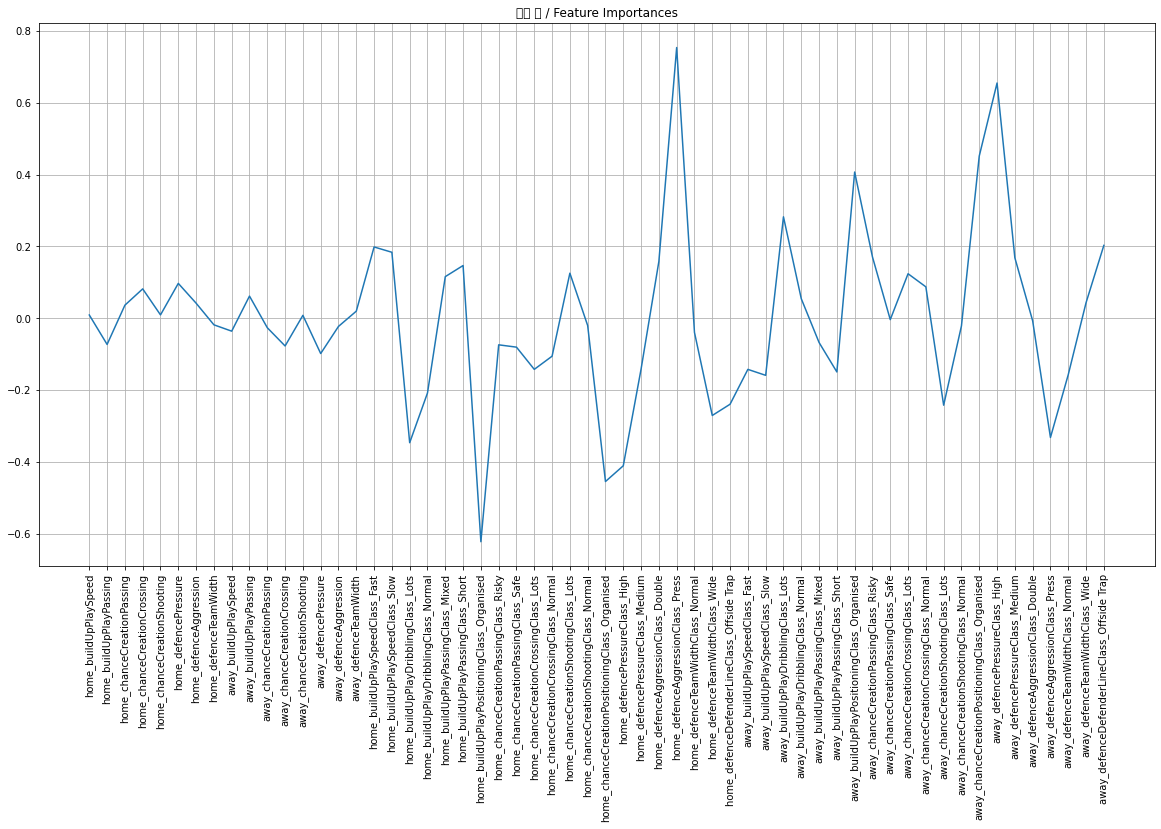

In [95]:
# Logistic Regression 모델의 coef_ 속성을 plot하기


plt.figure(figsize=(20, 10))
plt.plot(X.columns, model_lr.coef_[0])
plt.xticks(rotation=90)
plt.grid(True)
plt.title('홈팀 승 / Feature Importances')
plt.show()


### 문제 17. XGBoost 모델로 특징의 중요도 확인하기

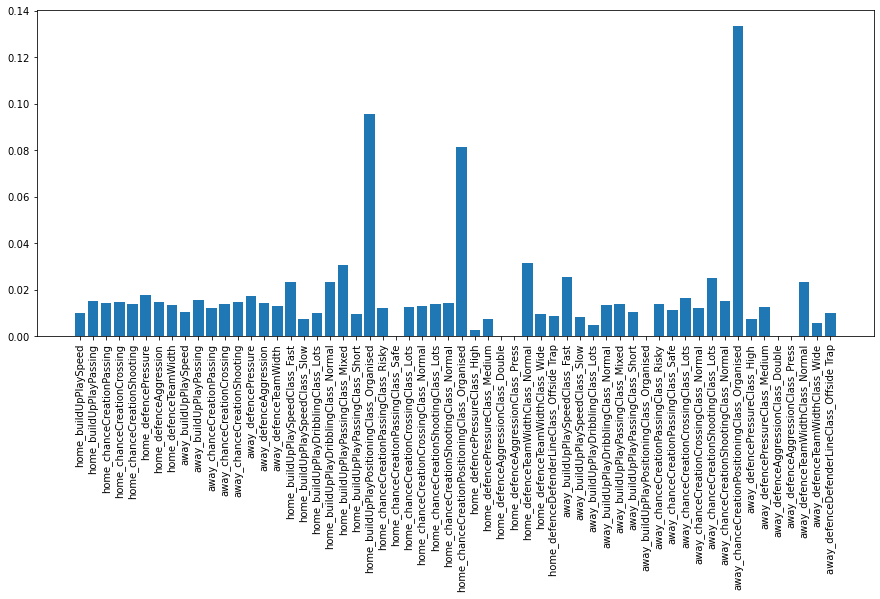

In [97]:
# XGBoost 모델의 feature_importances_ 속성을 plot하기

fig = plt.figure(figsize=(15, 6))
plt.bar(X.columns, model_xgb.feature_importances_)
plt.xticks(rotation=90)
plt.show()



## Step6 모델 성능 개선하기


### 문제 18. 매치 데이터프레임에 선수 특성 데이터프레임 통합하기

In [100]:
# 선수 특성 중 유의미한 정보를 매치 데이터프레임에 통합하기

display(df_player)
display(df_player_att)

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,age
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,30
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146,33
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163,31
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198,40
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154,43
...,...,...,...,...,...,...,...,...
11055,11071,26357,Zoumana Camara,2488,1979-04-03 00:00:00,182.88,168,43
11056,11072,111182,Zsolt Laczko,164680,1986-12-18 00:00:00,182.88,176,36
11057,11073,36491,Zsolt Low,111191,1979-04-29 00:00:00,180.34,154,43
11058,11074,35506,Zurab Khizanishvili,47058,1981-10-06 00:00:00,185.42,172,41


,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,183974,102359,39902,2009-08-30 00:00:00,83.0,85.0,right,medium,low,84.0,...,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183974,183975,102359,39902,2009-02-22 00:00:00,78.0,80.0,right,medium,low,74.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183975,183976,102359,39902,2008-08-30 00:00:00,77.0,80.0,right,medium,low,74.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,183977,102359,39902,2007-08-30 00:00:00,78.0,81.0,right,medium,low,74.0,...,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


In [101]:
df = df_match[['home_team_goal', 'away_team_goal']].copy()

for team in ['home_', 'away_']:
    team_map.index.name = team + 'team_api_id'
    for col in team_map.columns:
        df[team+col] = df_match[team_map.index.name].map(team_map[col])
        
df.dropna(inplace=True)
df.head()

,home_team_goal,away_team_goal,home_buildUpPlaySpeed,home_buildUpPlaySpeedClass,home_buildUpPlayDribblingClass,home_buildUpPlayPassing,home_buildUpPlayPassingClass,home_buildUpPlayPositioningClass,home_chanceCreationPassing,home_chanceCreationPassingClass,...,away_chanceCreationShooting,away_chanceCreationShootingClass,away_chanceCreationPositioningClass,away_defencePressure,away_defencePressureClass,away_defenceAggression,away_defenceAggressionClass,away_defenceTeamWidth,away_defenceTeamWidthClass,away_defenceDefenderLineClass
0,1,1,56.333333,Balanced,Little,44.333333,Mixed,Organised,55.666667,Normal,...,53.750000,Normal,Organised,48.250000,Medium,49.000000,Press,58.750000,Wide,Cover
1,0,0,55.500000,Balanced,Little,52.666667,Mixed,Organised,50.000000,Normal,...,54.333333,Normal,Organised,48.833333,Medium,55.166667,Press,55.500000,Normal,Cover
2,0,3,53.666667,Balanced,Little,44.166667,Mixed,Organised,59.000000,Normal,...,51.333333,Normal,Organised,59.666667,Medium,47.666667,Press,63.833333,Normal,Cover
3,5,0,54.166667,Balanced,Little,46.333333,Mixed,Organised,44.500000,Normal,...,46.000000,Normal,Organised,46.000000,Medium,45.000000,Press,47.000000,Normal,Cover
5,1,1,56.666667,Balanced,Little,47.333333,Mixed,Organised,47.500000,Normal,...,47.666667,Normal,Organised,53.666667,Medium,53.833333,Press,54.666667,Normal,Cover


In [106]:
player_overall = df_player_att.groupby('player_api_id').mean()['overall_rating']

In [107]:
pd.merge(left=df_player, right=player_overall, how='inner', on='player_api_id')

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,age,overall_rating
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,30,63.600000
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146,33,66.969697
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163,31,67.000000
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198,40,69.086957
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154,43,73.240000
...,...,...,...,...,...,...,...,...,...
11055,11071,26357,Zoumana Camara,2488,1979-04-03 00:00:00,182.88,168,43,74.384615
11056,11072,111182,Zsolt Laczko,164680,1986-12-18 00:00:00,182.88,176,36,65.687500
11057,11073,36491,Zsolt Low,111191,1979-04-29 00:00:00,180.34,154,43,67.571429
11058,11074,35506,Zurab Khizanishvili,47058,1981-10-06 00:00:00,185.42,172,41,70.750000


In [115]:
for col in (s + str(idx) for s in ['home_player_', 'away_player_'] for idx in range(1, 12)):
    df[col + '_rating'] = df_match[col].map(player_overall)
    
## NaN 값 제거
df.dropna(inplace=True)
df.head()

,home_team_goal,away_team_goal,home_buildUpPlaySpeed,home_buildUpPlaySpeedClass,home_buildUpPlayDribblingClass,home_buildUpPlayPassing,home_buildUpPlayPassingClass,home_buildUpPlayPositioningClass,home_chanceCreationPassing,home_chanceCreationPassingClass,...,away_player_2_rating,away_player_3_rating,away_player_4_rating,away_player_5_rating,away_player_6_rating,away_player_7_rating,away_player_8_rating,away_player_9_rating,away_player_10_rating,away_player_11_rating
145,2,1,56.666667,Balanced,Little,47.333333,Mixed,Organised,47.5,Normal,...,71.388889,60.750000,66.750000,70.185185,69.333333,68.000000,65.000000,71.666667,64.611111,71.826087
153,1,3,53.666667,Balanced,Little,44.166667,Mixed,Organised,59.0,Normal,...,68.142857,70.375000,69.888889,70.720000,68.444444,68.541667,71.739130,71.190476,69.714286,69.130435
155,2,0,51.333333,Balanced,Little,45.166667,Mixed,Organised,63.5,Risky,...,67.625000,61.750000,63.722222,63.411765,64.714286,68.000000,70.521739,67.500000,65.666667,66.083333
162,2,1,56.666667,Balanced,Little,47.333333,Mixed,Organised,47.5,Normal,...,71.060606,72.166667,64.100000,69.407407,72.107143,69.240000,79.692308,77.972973,71.416667,70.896552
168,0,0,55.500000,Balanced,Little,52.666667,Mixed,Organised,50.0,Normal,...,60.400000,58.333333,54.600000,62.333333,58.666667,65.800000,58.750000,74.928571,63.000000,67.111111


In [120]:
df['matchResult'] = df[['home_team_goal', 'away_team_goal']].aggregate(lambda x: 0 if x[0] > x[1] else 1 if x[0] == x[1] else 2, axis=1)

In [122]:
df['matchResult']

145      0
153      2
155      0
162      0
168      1
        ..
25972    1
25974    0
25975    2
25976    0
25978    0
Name: matchResult, Length: 21246, dtype: int64

### 문제 19. 모델 재학습하여 평가하기

In [123]:
# StandardScaler를 이용해 수치형 데이터를 표준화하기
# Hint) Multicollinearity를 피하기 위해 불필요한 컬럼은 drop한다.
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


scaler = StandardScaler()

X_num = df.drop(['matchResult', 'home_team_goal', 'away_team_goal'] + col_cats, axis=1)
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_num_scaled = pd.DataFrame(data=X_scaled, index=X_num.index, columns=X_num.columns)
X_cat = df_cats = pd.get_dummies(df[col_cats], drop_first=True)

X = pd.concat([X_num_scaled, X_cat], axis=1)
y = df['matchResult']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [126]:
X_train.shape

(14872, 80)

In [127]:
y_train.shape

(14872,)

In [144]:
(y_test == 0).sum() / len(y_test)

0.46030749921556324

In [129]:
# LogisticRegression 모델 생성/학습
model_lr = LogisticRegression(max_iter=10000,)
model_lr.fit(X_train, y_train)

model_lr.score(X_test,y_test)

0.5298085974270473

In [131]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred = model_lr.predict(X_test)
print(classification_report(y_test, pred))




              precision    recall  f1-score   support

           0       0.55      0.82      0.66      2934
           1       0.38      0.02      0.04      1616
           2       0.48      0.51      0.49      1824

    accuracy                           0.53      6374
   macro avg       0.47      0.45      0.40      6374
weighted avg       0.49      0.53      0.46      6374



In [148]:
# XGBClassifier 모델 생성/학습
model_xgb = XGBClassifier()

model_xgb.fit(X_train, y_train)

model_xgb.score(X_test, y_test)

0.49905867587072483

In [134]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred = model_xgb.predict(X_test)

print(classification_report(y_test, pred))




              precision    recall  f1-score   support

           0       0.55      0.73      0.63      2934
           1       0.27      0.13      0.18      1616
           2       0.48      0.46      0.47      1824

    accuracy                           0.50      6374
   macro avg       0.44      0.44      0.42      6374
weighted avg       0.46      0.50      0.47      6374



/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54856 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54016 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49849 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 54856 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 54016 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 49849 missing from curre

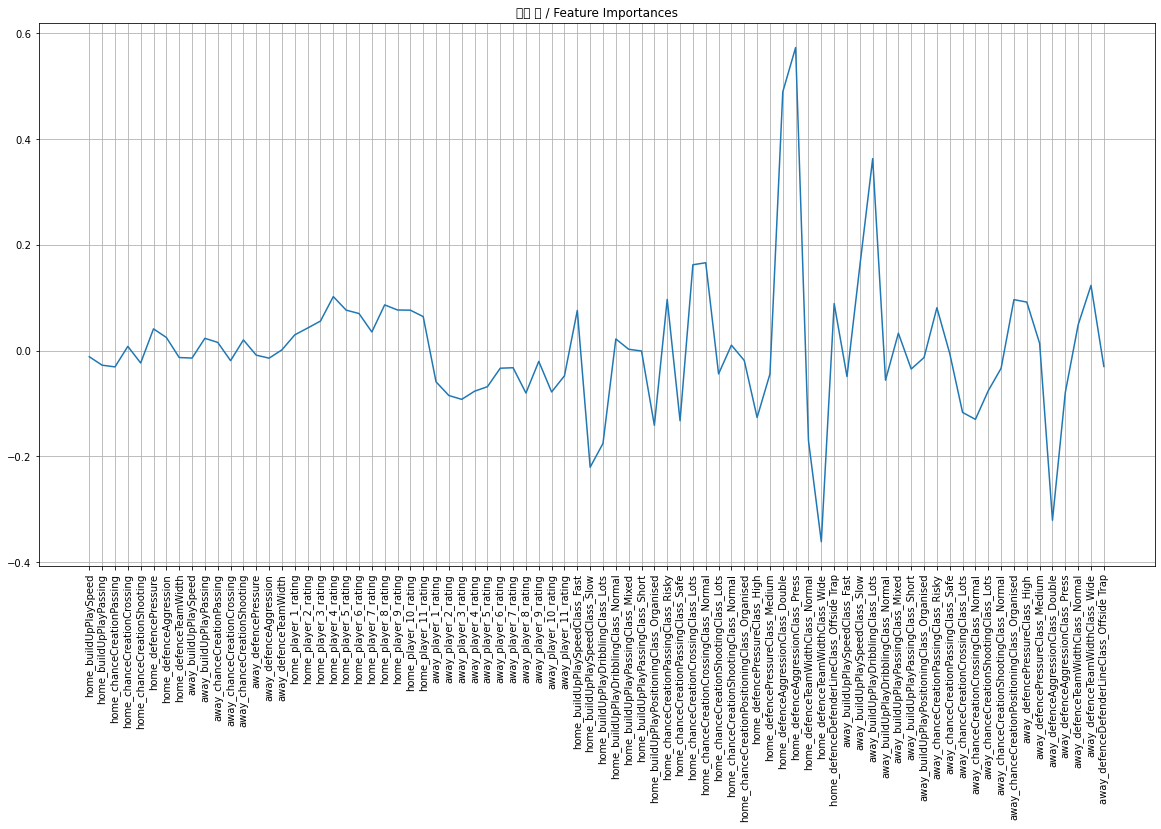

In [135]:
# Logistic Regression 모델의 coef_ 속성을 plot하기


plt.figure(figsize=(20, 10))
plt.plot(X.columns, model_lr.coef_[0])
plt.xticks(rotation=90)
plt.grid(True)
plt.title('홈팀 승 / Feature Importances')
plt.show()


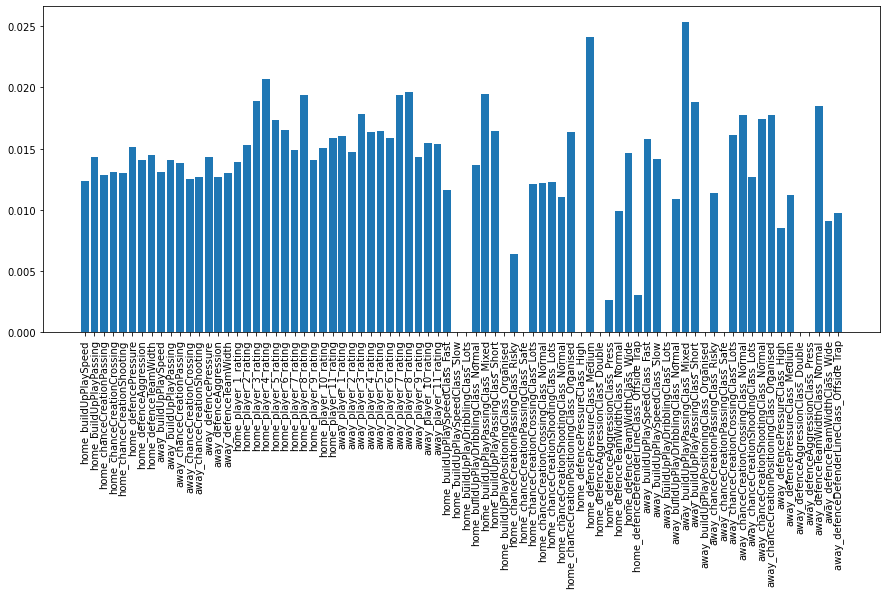

In [136]:
# XGBoost 모델의 feature_importances_ 속성을 plot하기

fig = plt.figure(figsize=(15, 6))
plt.bar(X.columns, model_xgb.feature_importances_)
plt.xticks(rotation=90)
plt.show()

